IRIS Dataset Accuracy: 1.0
IRIS Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
IRIS Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Diabetes Dataset Accuracy: 0.6883116883116883
Diabetes Confusion Matrix:
 [[79 20]
 [28 27]]
Diabetes Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

Optimal K for Heart Dataset: 11
Heart Dataset Acc

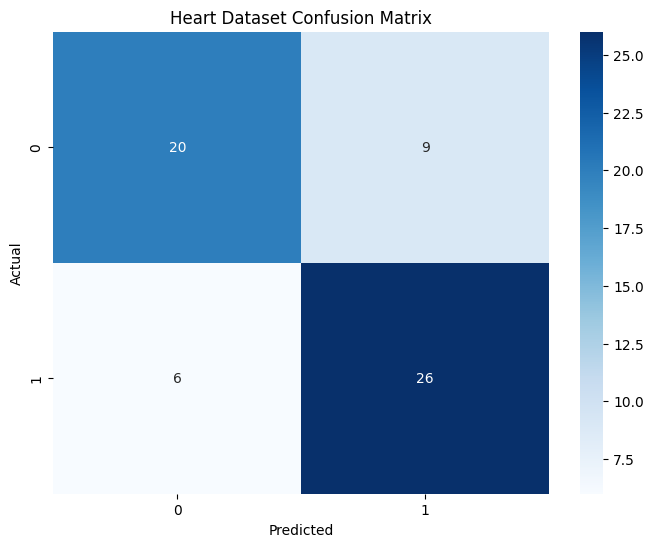

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the IRIS dataset
iris = pd.read_csv('iris.csv')

# IRIS Dataset: Preprocessing and Model
X_iris = iris.iloc[:, :-1].values
y_iris = iris.iloc[:, -1].values
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train the KNN model
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train_iris, y_train_iris)

# Predict and evaluate
y_pred_iris = knn_iris.predict(X_test_iris)
print("IRIS Dataset Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("IRIS Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("IRIS Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

# Load the Diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

# Diabetes Dataset: Feature Scaling and Model
X_diabetes = diabetes.iloc[:, :-1].values
y_diabetes = diabetes.iloc[:, -1].values
scaler = StandardScaler()
X_scaled_diabetes = scaler.fit_transform(X_diabetes)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_scaled_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Train the KNN model
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Predict and evaluate
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)
print("Diabetes Dataset Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Diabetes Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))
print("Diabetes Classification Report:\n", classification_report(y_test_diabetes, y_pred_diabetes))

# Load the Heart dataset
heart = pd.read_csv('heart.csv')

# Heart Dataset: Finding Optimal K
X_heart = heart.iloc[:, :-1].values
y_heart = heart.iloc[:, -1].values
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Finding optimal k
accuracy_scores = []
for k in range(1, 21):
    knn_heart = KNeighborsClassifier(n_neighbors=k)
    knn_heart.fit(X_train_heart, y_train_heart)
    y_pred_heart = knn_heart.predict(X_test_heart)
    accuracy_scores.append(accuracy_score(y_test_heart, y_pred_heart))

optimal_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Optimal K for Heart Dataset:", optimal_k)

# Train and evaluate with optimal K
knn_heart = KNeighborsClassifier(n_neighbors=optimal_k)
knn_heart.fit(X_train_heart, y_train_heart)
y_pred_heart = knn_heart.predict(X_test_heart)
print("Heart Dataset Accuracy:", accuracy_score(y_test_heart, y_pred_heart))
print("Heart Confusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("Heart Classification Report:\n", classification_report(y_test_heart, y_pred_heart))

# Plotting Confusion Matrix for Heart Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_heart, y_pred_heart), annot=True, fmt="d", cmap="Blues")
plt.title("Heart Dataset Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
